In [1]:
import os 
import pandas as pd
import src.source as sr
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
terrorism = pd.read_csv('input/globalterrorismdb_0718dist.csv',encoding='latin-1')
terrorism.head()

/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
terrorism=terrorism[['eventid', 'iyear', 'imonth', 'iday','country_txt', 'region_txt','provstate','city', 'latitude', 'longitude', 'specificity','attacktype1_txt', 'nkill','nwound','gname', 'motive','suicide','targtype1_txt']]
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'attacktype1_txt', 'nkill', 'nwound', 'gname', 'motive', 'suicide',
       'targtype1_txt'],
      dtype='object')

In [5]:
terrorism.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,specificity,attacktype1_txt,nkill,nwound,gname,motive,suicide,targtype1_txt
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,Assassination,1.0,0.0,MANO-D,NaN,0,Private Citizens & Property
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,NaN,0,Government (Diplomatic)
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,Assassination,1.0,0.0,Unknown,NaN,0,Journalists & Media
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,Bombing/Explosion,NaN,NaN,Unknown,NaN,0,Government (Diplomatic)
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,Facility/Infrastructure Attack,NaN,NaN,Unknown,NaN,0,Government (Diplomatic)


In [6]:
terrorism.rename(columns={'eventid':'ID', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country','region_txt':'Region', 'provstate':'State', 'city':'City', 'attacktype1_txt':'Type', 'gname':'Terr_group', 'motive':'Motive', 'suicide':'Suicide','targtype1_txt':'Target'},inplace=True)
terrorism.head()

,ID,Year,Month,Day,Country,Region,State,City,latitude,longitude,specificity,Type,nkill,nwound,Terr_group,Motive,Suicide,Target
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,Assassination,1.0,0.0,MANO-D,NaN,0,Private Citizens & Property
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,NaN,0,Government (Diplomatic)
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,Assassination,1.0,0.0,Unknown,NaN,0,Journalists & Media
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,Bombing/Explosion,NaN,NaN,Unknown,NaN,0,Government (Diplomatic)
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,Facility/Infrastructure Attack,NaN,NaN,Unknown,NaN,0,Government (Diplomatic)


In [7]:
terrorism["specificity"].value_counts()

1.0    144996
3.0     14615
2.0      8990
4.0      8534
5.0      4550
Name: specificity, dtype: int64

In [8]:
terrorism.drop(["Motive"],axis=1).head()

,ID,Year,Month,Day,Country,Region,State,City,latitude,longitude,specificity,Type,nkill,nwound,Terr_group,Suicide,Target
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,Assassination,1.0,0.0,MANO-D,0,Private Citizens & Property
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,0,Government (Diplomatic)
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,Assassination,1.0,0.0,Unknown,0,Journalists & Media
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,Bombing/Explosion,NaN,NaN,Unknown,0,Government (Diplomatic)
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,Facility/Infrastructure Attack,NaN,NaN,Unknown,0,Government (Diplomatic)


In [9]:
terrorism.Country.describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: Country, dtype: object

In [10]:
españa=sr.datacol(terrorism,"Country","Spain")
españa.State.value_counts().head()

Basque Country    1446
Madrid             434
Catalonia          234
Navarre            203
Andalusia          119
Name: State, dtype: int64

In [11]:
provincias= list(españa.State.items())
import re
provincias
for i in provincias:
    ind=[i[0]]
    r1=re.findall(r'Lu.*|Gali.*|Our.*|Pont.*|A C.*',i[1])
    r2=re.findall(r'And.*|Sevil.*|Cadiz|Malaga|Cord.*',i[1])
    r3=re.findall(r'Sego.*|Sor*|Vallad.*|Bur.*|Pale.*|Salam.*|.*Leon.*',i[1])
    r4=re.findall(r'Ciud.*|Tole.*|Castile-La Mancha',i[1])
    r5=re.findall(r'Gipuz.*|Guipuz.*|Ala.*|Biscay|Basque.*',i[1])
    r6=re.findall(r'Gir.*|Lerida|Tarrag.*|Barc',i[1])
    r7= re.findall(r'Zar*',i[1])
    r8=re.findall(r'Santa.*|Las P.*',i[1])
    if r1:
        españa["State"][ind]="Galicia"
    elif r2:
        españa["State"][ind]="Andalusia"
    elif r3:
        españa["State"][ind]="Castile and Leon"
    elif r4:
        españa["State"][ind]="Castile-La Mancha"
    elif r5:
        españa["State"][ind]="Basque Country"
    elif r6:
        españa["State"][ind]="Catalonia"
    elif r7:
        españa["State"][ind]="Aragon"
    elif r8:
        españa["State"][ind]="Canary Islands"


/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1092: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [12]:
españa.State.value_counts()

Basque Country       1662
Madrid                434
Catalonia             309
Navarre               203
Andalusia             131
Valencia              101
Galicia                99
Unknown                59
Castile and Leon       48
Cantabria              46
Aragon                 36
Canary Islands         34
Asturias               26
La Rioja               22
Castile-La Mancha      15
Balearic Islands       10
Murcia                  8
Melilla                 3
Extremadura             2
Ceuta                   1
Name: State, dtype: int64

In [13]:
terrorism.Target.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target, dtype: int64

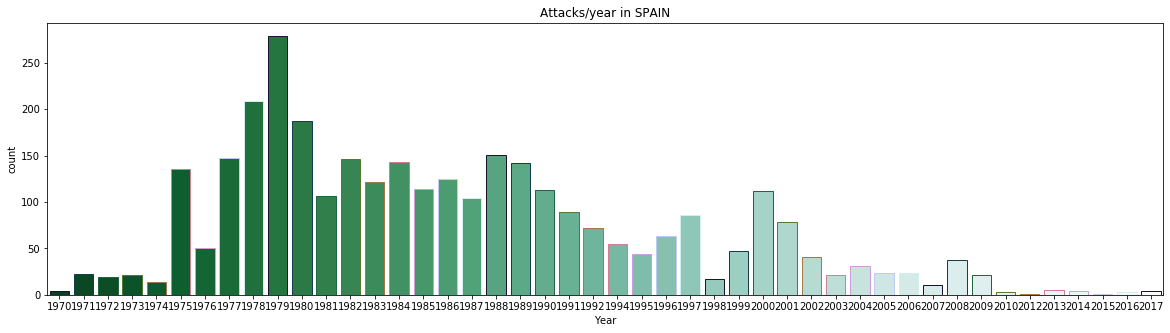

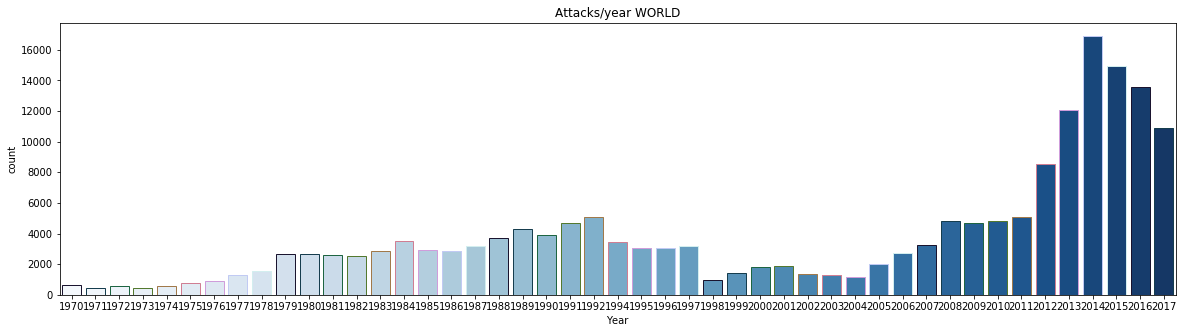

Text(0.5, 1.0, 'Nº Attacks each year WORLD')

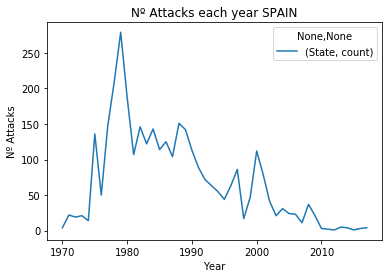

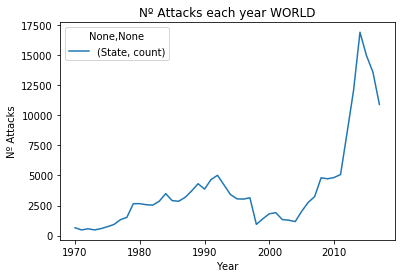

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,5))
sns.countplot('Year',data=españa,palette="BuGn_r",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year in SPAIN')
plt.show()

plt.subplots(figsize=(20,5))
sns.countplot('Year',data=terrorism,palette="Blues",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year WORLD')
plt.show()



df_3=españa.groupby("Year").agg({"State":["count"]})
df_3.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year SPAIN")
df_4=terrorism.groupby("Year").agg({"State":["count"]})
df_4.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year WORLD")

In [15]:
df_4=españa["Type"].value_counts()
df_4

Bombing/Explosion                      1902
Assassination                           599
Armed Assault                           298
Facility/Infrastructure Attack          292
Hostage Taking (Kidnapping)              95
Unknown                                  42
Hostage Taking (Barricade Incident)      11
Hijacking                                 6
Unarmed Assault                           4
Name: Type, dtype: int64

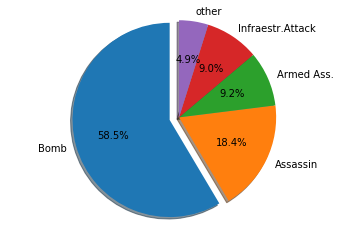

In [16]:
labels = 'Bomb', 'Assassin', 'Armed Ass.','Infraestr.Attack','other'
sizes = [1902, 599, 298, 292,158]
explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 1, 'Correlation matrix')

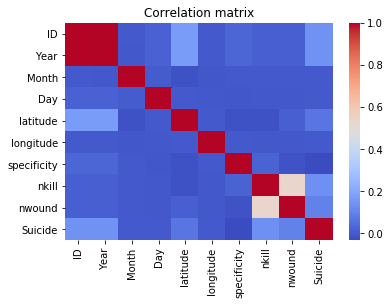

In [17]:
sns.heatmap(terrorism.corr(),cmap='coolwarm')
plt.title('Correlation matrix')

Text(0.5, 0, 'Count')

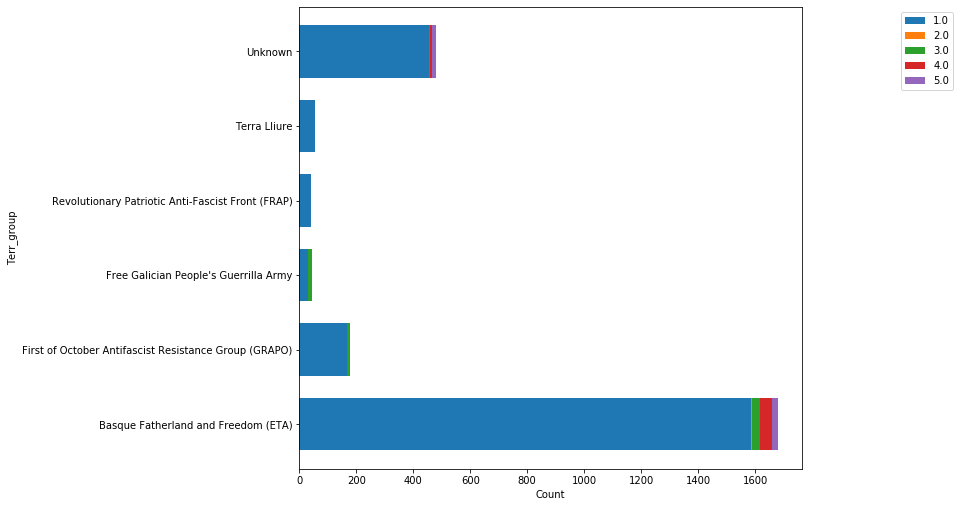

In [18]:
grupo=españa[españa['Terr_group'].isin(españa['Terr_group'].value_counts()[0:6].index)]
objetivo=grupo[grupo['Target'].isin(grupo['Target'].value_counts()[0:5].index)]
pd.crosstab(objetivo['Terr_group'],objetivo['specificity']).plot.barh(stacked=True,figsize=(9,8.5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))
plt.xlabel("Count")

In [19]:
españa["Terr_group"].value_counts().head(6)

Basque Fatherland and Freedom (ETA)                      1975
Unknown                                                   614
First of October Antifascist Resistance Group (GRAPO)     207
Terra Lliure                                               62
Revolutionary Patriotic Anti-Fascist Front (FRAP)          49
Free Galician People's Guerrilla Army                      47
Name: Terr_group, dtype: int64

In [20]:
#españa.to_csv(r'../españa.csv',index=False,header=True)

In [21]:
#terrorism.to_csv(r'../terrorism.csv',index=False,header=True)

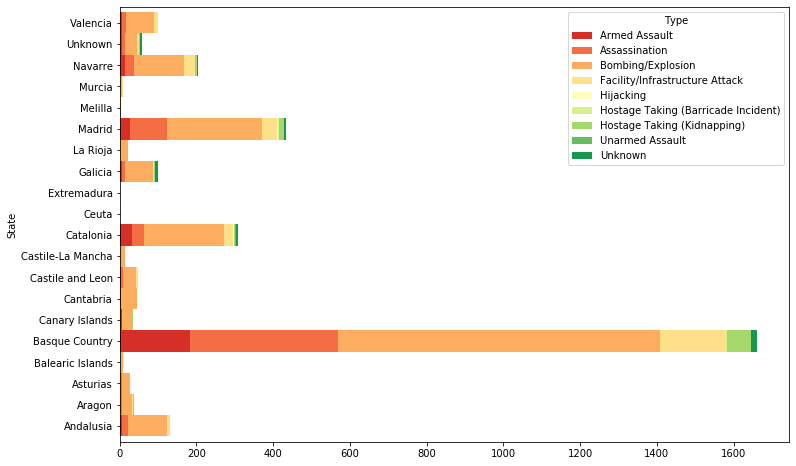

In [22]:
pd.crosstab(españa.State,españa.Type).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

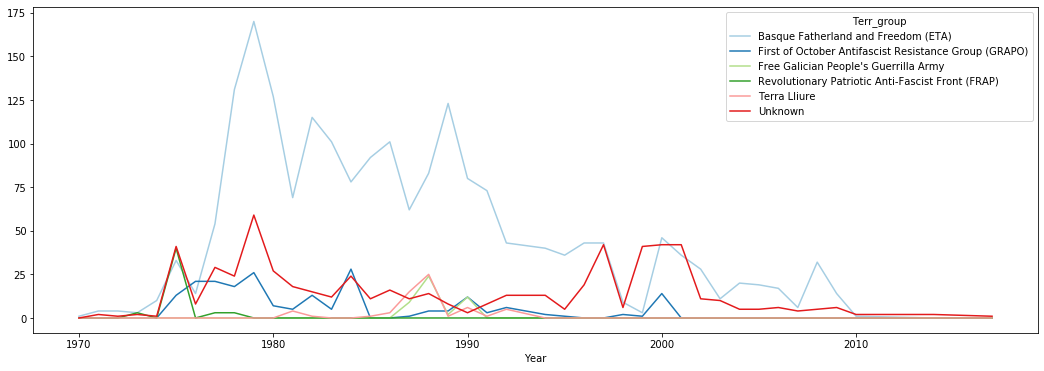

In [27]:
top_groups5=sr.top5(españa,"Terr_group")
pd.crosstab(top_groups5.Year,top_groups5.Terr_group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [26]:
df_5=sr.top5(españa,"Terr_group")
df_5=sr.agruparmean(df_5,"Terr_group","specificity")
df_5

,specificity
,mean
Terr_group,
Basque Fatherland and Freedom (ETA),1.195443
First of October Antifascist Resistance Group (GRAPO),1.149758
Free Galician People's Guerrilla Army,1.510638
Revolutionary Patriotic Anti-Fascist Front (FRAP),1.163265
Terra Lliure,1.000000
Unknown,1.151466


In [30]:
numero=sr.datacol(españa,"Terr_group","Basque Fatherland and Freedom (ETA)")

In [50]:
numero=numero.nkill.dropna()

In [55]:
list(numero)
count=0
for i in list(numero):
    if i>0.0:
        count+=i
count

814.0